In [1]:
import json
import numpy as np
import torch
from torch import nn
from torch.utils import data
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
with open('./testdump_1.txt') as f:
    json_data = json.load(f)

In [3]:
states = []
actions = []
for sa in json_data:
    states.append(np.array([float(x) for x in sa["state"]["ai_1"]]))
    actions.append(int(sa["ai_1"]))

In [4]:
num_states = len(states[0])
num_actions = max(actions) + 1
print(num_states, num_actions)

39 30


In [5]:
train_states, test_states, train_actions, test_actions = train_test_split(states, actions, test_size=0.15)
tensor_train_states = torch.Tensor(train_states)
tensor_train_actions = torch.Tensor(train_actions)
tensor_test_states = torch.Tensor(test_states)
tensor_test_actions = torch.Tensor(test_actions)

train_dataset = data.TensorDataset(tensor_train_states, tensor_train_actions)
train_dataloader = data.DataLoader(train_dataset, batch_size=64, shuffle=True) 
test_dataset = data.TensorDataset(tensor_test_states, tensor_test_actions)
test_dataloader = data.DataLoader(test_dataset, batch_size=64) 

In [20]:
bc_agent = nn.Sequential(
    nn.Linear(num_states, 40),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(40, 40),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(40, num_actions)
).cuda()
optimizer = torch.optim.Adam(bc_agent.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss(weight=torch.Tensor([0.1] + [1] * (num_actions - 1)).cuda())

In [21]:
train_total_losses = []
test_total_losses = []
for epoch in range(200):
    train_total_loss = 0
    train_steps = 0
    for s, a in train_dataloader:
        s = s.float().cuda()
        a = a.long().cuda()
    
        loss = loss_func(bc_agent(s), a)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_steps += 1
        train_total_loss += loss.detach().cpu().numpy()
    train_total_losses.append(train_total_loss / train_steps)
    
    test_total_loss = 0
    test_steps = 0
    for s, a in test_dataloader:
        s = s.float().cuda()
        a = a.long().cuda()
        loss = loss_func(bc_agent(s), a)
        
        test_steps += 1
        test_total_loss += loss.detach().cpu().numpy()
    test_total_losses.append(test_total_loss / test_steps)

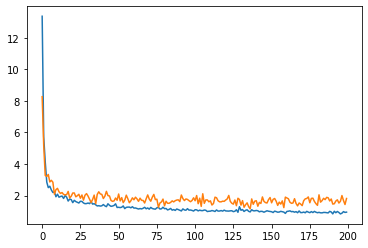

In [22]:
plt.plot(range(len(train_total_losses)), train_total_losses)
plt.plot(range(len(test_total_losses)), test_total_losses)
plt.show()

In [23]:
train_total_losses

[13.356629427741556,
 5.724663257598877,
 4.142067747957566,
 2.857083559036255,
 2.5005977574516747,
 2.589845019228318,
 2.355169317301582,
 2.1927902698516846,
 2.232376912060906,
 1.9234165093478035,
 2.0851141424740063,
 1.893811920109917,
 1.9387302188312305,
 1.9672298992381376,
 1.8143036505755257,
 1.9973976541967953,
 1.896510173292721,
 1.6496642196879667,
 1.7794795877793257,
 1.7423735716763664,
 1.5498378417071175,
 1.6968293575679554,
 1.6161899706896614,
 1.5681710523717545,
 1.5261358057751375,
 1.6382151736932642,
 1.6260104179382324,
 1.5299536620869356,
 1.4840522478608524,
 1.4916304174591513,
 1.5239378459313337,
 1.4871805170003105,
 1.6071315127260544,
 1.4556971157298368,
 1.4850312716820662,
 1.412561395589043,
 1.3407318767379313,
 1.3559760556501501,
 1.3325799282859354,
 1.3481091068071478,
 1.4290750061764437,
 1.3451164855676538,
 1.2943799215204574,
 1.478219631840201,
 1.3810065038063948,
 1.3172450275982128,
 1.3353341011440052,
 1.372808007632985,
 1.